In [81]:
import networkx as nx
import konect2networkx as k2n

# param: internal name of the konect graph(string), number of generated ust graphs(int)
def konect_ust_matrix(name, number):
  G = k2n.get(name, download = True, logging = False)

  orig_edges = list(G.edges())
  res = [[0 for i in range(0, G.number_of_edges())] for j in range(number + 1)] 
    # range(number + 1) --> first row is the edgelist
    
  for i in range(G.number_of_edges()):
      res[0][i] = orig_edges[i]

  for i in range(1, number):
      tree = nx.random_spanning_tree(G, None)
      tree_edges = list(tree.edges())
      for j in range(G.number_of_edges()):
          found = 0
          k = 0
          while k in range(0, tree.number_of_edges())  and  found == 0:
            if orig_edges[j] == tree_edges[k]:
                res[i][j] = 1
                found = 1
            k += 1

  return res

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!

Eredeti gráf:


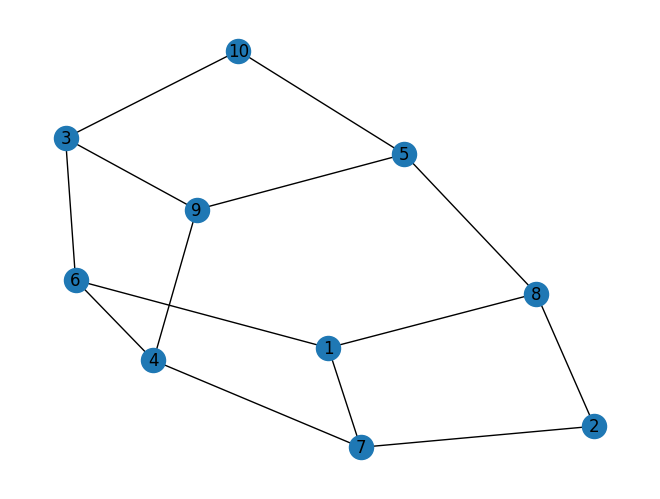

In [82]:
res = konect_ust_matrix('brunson_southern-women', 6)

print("\n")
for row in res:
  print(row)
print("\n")

G = k2n.get('brunson_southern-women', download = True, logging = False)
G2 = nx.Graph()
G2.add_edges_from(G.edges())
print("\nEredeti gráf:")
nx.draw(G2, with_labels=True)

In [83]:
def konect_ust_normalized(res):

  edges = len(res[0])
  normal_res = [[0 for i in range(edges)] for j in range(2)]
  # copy edgelist of the original graph
  normal_res[0] = res[0]

  for i in range(1, len(res)):
    for j in range(edges):
      normal_res[1][j] += res[i][j]
   
  # normalization
  for j in range(len(res[0])):
    normal_res[1][j] = round(normal_res[1][j]/(len(res)-1), 3)

  return normal_res

In [88]:
normal_res = konect_ust_normalized(konect_ust_matrix('brunson_southern-women', 200))

print("\n")
for row in normal_res:
  print(row)

## TODO : draw weighted graph

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[0.405, 0.215, 0.22, 0.705, 0.395, 0.35, 0.265, 0.645, 0.515, 0.58, 0.155, 0.44, 0.685, 0.565]
